<h1>Импорт библиотек

In [293]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [294]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    s = 0
    for i in range(len(X)):
        s += np.dot(X[i], V[i])
    return s


assert np.array_equal(sum_prod([[[1, 2], [3, 4]]], [[1, 2]]), [5, 11])
assert np.array_equal(sum_prod([[[5, 6], [7, 8]], [[1, 2], [3, 4]]], [[1, 1], [2, 2]]), [17, 29])
assert np.array_equal(sum_prod([[[5, 6], [7, 8]], [[1, 2], [3, 4]], [[7, 5], [1, 1]]], [[1, 1], [2, 2], [3, 3]]),
                      [53, 35])
assert np.array_equal(sum_prod([], []), 0)
assert np.array_equal(sum_prod([[[1]]], [[1]]), [1])

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [295]:
def binarize(M, threshold=0.5):
    matrix = []
    for i in M:
        check = [1 if e > threshold else 0 for e in i]
        matrix.append(check)
    return matrix

def test():
    assert binarize([[0.1, 0.6, 0.4], [0.7, 0.3, 0.8], [0.2, 0.9, 0.5]]) == [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
    assert binarize([[0, 0, 0], [0, 0, 0]]) == [[0, 0, 0], [0, 0, 0]]
    print('Все тесты пройдены!')
    
test()

Все тесты пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [296]:
def unique_rows(mat):
  return [(set(row)) for row in mat]

def unique_columns(mat):
  return [(set(column)) for column in zip(*mat)]

rows = [
    [1, 2, 3, 4, 5],
    [5, 6, 7, 7, 4],
    [5, 4, 4, 4, 3]]

print(unique_rows(rows))

column = [
    [1, 1, 2, 9],
    [2, 2, 2, 5],
    [3, 2, 2, 7],
    [5, 3, 2, 6]]

print(unique_columns(column))

[{1, 2, 3, 4, 5}, {4, 5, 6, 7}, {3, 4, 5}]
[{1, 2, 3, 5}, {1, 2, 3}, {2}, {9, 5, 6, 7}]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

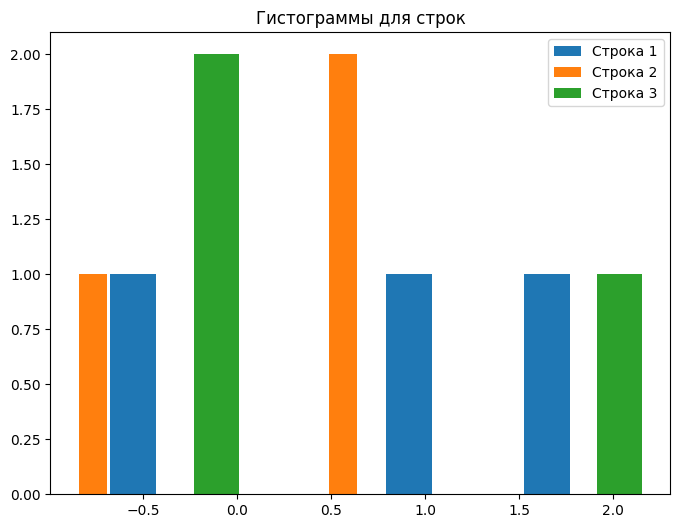

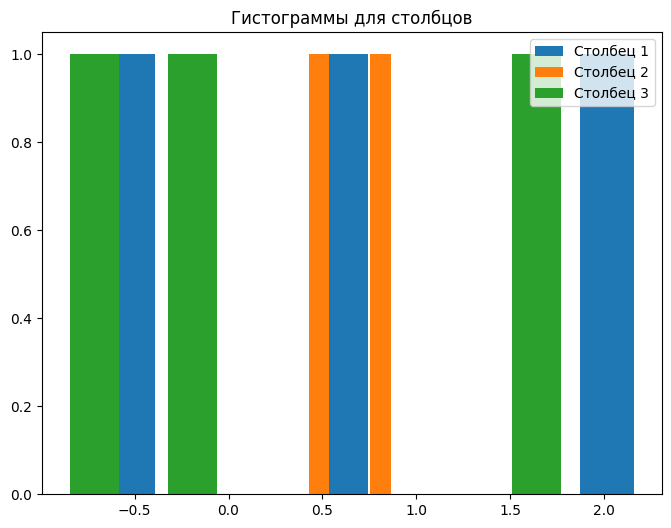

Матрица:
[[-0.67519638  0.86463024  1.77130296]
 [ 0.63793558  0.5019981  -0.84414229]
 [ 2.15518352 -0.23228305 -0.15980752]]
Мат ожидания строк: [0.65357894 0.09859713 0.58769765]
Мат ожидания столбцов: [0.70597424 0.3781151  0.25578438]
Дисперии строк: [1.01983117 0.44745864 1.22938143]
Дисперсии столбцов: [1.33748969 0.20820996 1.22645063]


In [303]:
def fill_matrix(m, n):
    matrix = np.random.normal(size=(m, n))
    row_mat_expectation = np.mean(matrix, axis=1)
    column_mat_expectation = np.mean(matrix, axis=0)
    row_dispersion = np.var(matrix, axis=1)
    column_dispersion = np.var(matrix, axis=0)
    plt.figure(figsize=(8, 6))

    for i in range(m):
        plt.hist(matrix[i], label=f"Строка {i + 1}", color=f"C{i}")
    plt.title('Гистограммы для строк')
    plt.legend()
    plt.show()
    plt.figure(figsize=(8, 6))

    for i in range(n):
        plt.hist(matrix[:, i], label=f"Столбец {i + 1}", color=f"C{i}")
    plt.title('Гистограммы для столбцов')
    plt.legend()
    plt.show()

    print(f"Матрица:\n{matrix}")
    print(f"Мат ожидания строк: {row_mat_expectation}")
    print(f"Мат ожидания столбцов: {column_mat_expectation}")
    print(f"Дисперии строк: {row_dispersion}")
    print(f"Дисперсии столбцов: {column_dispersion}")
    return matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion

matrix, row_mat_expectation, column_mat_expectation, row_dispersion, column_dispersion = fill_matrix(3, 3)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [298]:
def chess(m, n, a, b):
    mat = np.empty((m, n))
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b
    return mat

assert np.array_equal(chess(2, 2, 1, 0), np.array([[1, 0], [0, 1]]))
assert np.array_equal(chess(3, 4, 1, 0), np.array([[1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]))
assert np.array_equal(chess(4, 3, 1, 0), np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0]]))
assert np.array_equal(chess(3, 3, 1, 0), np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]]))
assert np.array_equal(chess(2, 2, -1, 2), np.array([[-1, 2], [2, -1]]))
assert np.array_equal(chess(2, 2, 5, 5), np.array([[5, 5], [5, 5]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

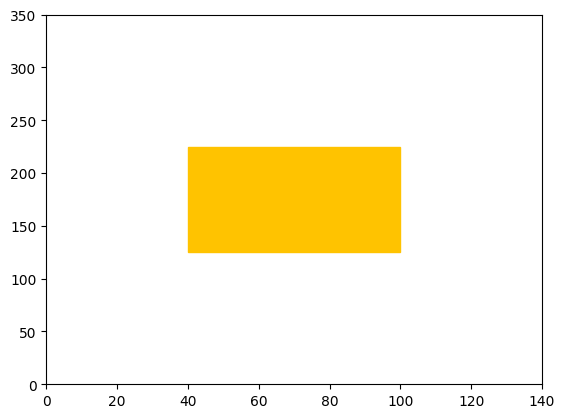

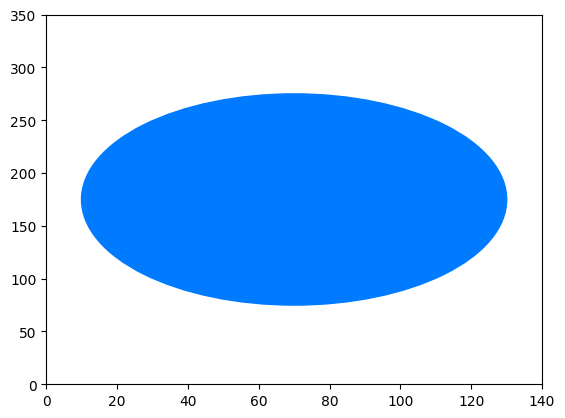

In [299]:
import matplotlib.patches as patches

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color=background_color)
    ax.add_patch(background)
    rect = patches.Rectangle(((m - a) / 2, (n - b) / 2), a, b, color=rectangle_color)
    ax.add_patch(rect)
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    background = patches.Rectangle((0, 0), m, n, color=background_color)
    ax.add_patch(background)
    a *= 2
    b *= 2
    eli = patches.Ellipse((m / 2, n / 2), a, b, color=ellipse_color)
    ax.add_patch(eli)
    plt.xlim(0, m)
    plt.ylim(0, n)
    plt.show()

draw_rectangle(60, 100, 140, 350, "#FFC300", "white")
draw_ellipse(60, 100, 140, 350, "#007BFF", "white")

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [300]:
def time_series(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    local_maxima = []
    local_minima = []
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(time_series[i])
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(time_series[i])
    rolling_mean = np.convolve(time_series, np.ones(3) / 3, 'valid')

    print(f"Мат. ожидание: {mean}")
    print(f"Дисперсия: {variance}")
    print(f"СКО: {std_dev}")
    print(f"Локальные максимумы: {local_maxima}")
    print(f"Локальные минимумы: {local_minima}")
    print(f"Скользящее среднее: {rolling_mean}")

time_series([1,2,7,4,9,6,7,8,9,10])

Мат. ожидание: 6.3
Дисперсия: 8.41
СКО: 2.9
Локальные максимумы: [7, 9]
Локальные минимумы: [4, 6]
Скользящее среднее: [3.33333333 4.33333333 6.66666667 6.33333333 7.33333333 7.
 8.         9.        ]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [301]:
def to_one_hot(data):
    num_values = len(data)
    encoded_data = np.zeros((num_values, num_values), dtype=int)
    for i, value in enumerate(data):
        encoded_data[i, value] = 1
    return encoded_data.tolist()


encoded_data = to_one_hot([0,2,3,0])
print(encoded_data)

[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
